# Phase 2 : Data Preprocessing

Label encoding is a type of data encoding technique used to convert categorical data into numerical representations. It is commonly used when the categories have an inherent ordinal relationship, meaning they have a natural order or ranking. The label encoder assigns a unique integer label to each category, preserving the ordinal relationship between them.

1. Machine learning algorithms work with numerical data. However, in real-world datasets, there are often categorical features (non-numeric) like gender, mode of shipment, customer rating category, etc.

2. To use categorical data in machine learning models, we need to convert them into numerical representations. This process is called encoding.

3. One common encoding technique is "one-hot encoding," where each category is converted into a binary vector, with 1 representing the presence of that category and 0 otherwise. Another encoding technique is "label encoding," where each category is assigned a unique numeric label.

4. By encoding categorical features, we make the data suitable for machine learning algorithms to learn from.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #enconding
from sklearn.preprocessing import StandardScaler #scaling 
import os
# !pip install sklearn

### Data preparation : We already have new dataset which is created from feature enginieering "stride_features.csv"  

In [2]:
current_dir = os.getcwd()
#defining current directory so that any developer can run the full notebook with any File not found error
dataset_dir = os.path.join(current_dir, '..', '..', 'Dataset')
file_path = os.path.join(dataset_dir, 'stride_features.csv') #dataframe with identified features
Stridedf = pd.read_csv(file_path)
df=Stridedf.copy()
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Interaction_Weight_Discount,Customer_rating_and_delivery_time,Product_importance_and_delivery_time,High_product_importance_and_high_rating,Weight_category,Discount_category,Product_Value,Customer_Loyalty,Customer_Satisfaction_Score,Delivery_Time_per_Weight
0,1,D,Flight,4,2,177,3,low,F,44,...,54252,2,low,0,Light,High,218241,Regular,1.5,616.50
1,2,F,Flight,4,5,216,2,low,M,59,...,182192,5,low,0,Medium,High,667008,New,3.0,1544.00
2,3,A,Flight,2,2,183,4,low,M,48,...,161952,2,low,0,Medium,High,617442,Regular,1.5,1687.00
3,4,B,Flight,3,3,176,4,medium,M,10,...,11770,3,medium,0,Light,Low,207152,Regular,2.0,588.50
4,5,C,Flight,2,2,184,3,medium,F,46,...,114264,2,medium,0,Medium,High,457056,Regular,1.5,1242.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,1538,1,medium,0,Light,Low,387576,Regular,1.0,384.50
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,7482,0,NaN,0,Light,Low,289304,Regular,0.5,311.75
10996,10997,C,Ship,5,4,242,5,low,F,4,...,4620,0,NaN,0,Light,Low,279510,Regular,2.0,288.75
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,2420,0,NaN,0,Light,Low,269830,Frequent,1.0,302.50


### checking the data types for each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       10999 non-null  int64  
 1   Warehouse_block                          10999 non-null  object 
 2   Mode_of_Shipment                         10999 non-null  object 
 3   Customer_care_calls                      10999 non-null  int64  
 4   Customer_rating                          10999 non-null  int64  
 5   Cost_of_the_Product                      10999 non-null  int64  
 6   Prior_purchases                          10999 non-null  int64  
 7   Product_importance                       10999 non-null  object 
 8   Gender                                   10999 non-null  object 
 9   Discount_offered                         10999 non-null  int64  
 10  Weight_in_gms                            10999

In [4]:
#we dont need the id column now for correlation
df = df.drop('ID', axis=True)

### Generic Function to encode any dataframe if non numeric columns are present.

In [5]:
def encode_categorical_columns(dataframe):
    # Copy the original DataFrame to avoid modifying the original data
    df = dataframe.copy()

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Create a list to store the names of the encoded columns
    encoded_columns = []

    # go through all columns in the DataFrame
    for column in df.columns:
        # Check if the data type of the column is 'object'  (i.e., categorical)
        if df[column].dtype != 'int64' and 'float64':
            # Encode the categorical column using LabelEncoder
            df[column + '_encoded'] = label_encoder.fit_transform(df[column])
            # Add the name of the encoded column to the list
            encoded_columns.append(column + '_encoded')
            # Drop the original categorical column
            df.drop(column, axis=1, inplace=True)

    # Return the final DataFrame with encoded columns and the list of encoded column names
    return df, encoded_columns

### Calling the encode_categorical_columns function to get encoded dataframe

In [6]:
# Call the function on the original DataFrame 'df' to create endcoded df
final_encoded_df, encoded_columns = encode_categorical_columns(df)
print("This many columns are Encoded -> :", encoded_columns)
final_encoded_df

This many columns are Encoded -> : ['Warehouse_block_encoded', 'Mode_of_Shipment_encoded', 'Product_importance_encoded', 'Gender_encoded', 'Customer_rating_category_encoded', 'Prior_purchases_category_encoded', 'Shipping_speed_encoded', 'ProductImportance_avg_delivery_encoded', 'ShippingMode_avg_delivery_encoded', 'Product_importance_and_delivery_time_encoded', 'Weight_category_encoded', 'Discount_category_encoded', 'Customer_Loyalty_encoded', 'Customer_Satisfaction_Score_encoded', 'Delivery_Time_per_Weight_encoded']


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_encoded,Gender_encoded,Interaction_CustomerRating_Discount,...,Prior_purchases_category_encoded,Shipping_speed_encoded,ProductImportance_avg_delivery_encoded,ShippingMode_avg_delivery_encoded,Product_importance_and_delivery_time_encoded,Weight_category_encoded,Discount_category_encoded,Customer_Loyalty_encoded,Customer_Satisfaction_Score_encoded,Delivery_Time_per_Weight_encoded
0,4,2,177,3,44,1233,1,0,0,88,...,0,977,1,2,1,1,0,2,2,1663
1,4,5,216,2,59,3088,1,0,1,295,...,2,2844,1,2,1,2,0,1,5,4893
2,2,2,183,4,48,3374,1,0,1,96,...,0,6310,1,2,1,2,0,2,2,4930
3,3,3,176,4,10,1177,1,0,1,30,...,0,1477,0,2,2,1,1,2,3,1589
4,2,2,184,3,46,2484,1,0,0,92,...,0,4948,0,2,2,2,0,2,2,3994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,2,0,1,...,0,1432,0,1,2,1,1,2,1,862
10995,4,1,232,5,6,1247,0,2,0,6,...,0,1002,0,1,3,1,1,2,0,534
10996,5,4,242,5,4,1155,0,2,0,16,...,0,420,1,1,3,1,1,2,3,410
10997,5,2,223,6,2,1210,0,2,1,4,...,1,488,0,1,3,1,1,0,1,482


### Check that all columns are properly encoded to same dttype i.e. Numeric int64

In [7]:
#confirm that all columns are numeric now
final_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Customer_care_calls                           10999 non-null  int64
 1   Customer_rating                               10999 non-null  int64
 2   Cost_of_the_Product                           10999 non-null  int64
 3   Prior_purchases                               10999 non-null  int64
 4   Discount_offered                              10999 non-null  int64
 5   Weight_in_gms                                 10999 non-null  int64
 6   Reached.on.Time_Y.N                           10999 non-null  int64
 7   Mode_of_Shipment_encoded                      10999 non-null  int64
 8   Gender_encoded                                10999 non-null  int64
 9   Interaction_CustomerRating_Discount           10999 non-null  int64
 10  Interactio

### Imp Step 1 : Check the correlation of encoded dataframe with respect to Reached.on.Time_Y.N

we can see the lots of improvement in correlation after deriving new features, but still if we want to try to increase it, we can scale the data for continous values to get rid of overfitting.

In [8]:
#checking the correlation of encoded dataframe with respect to Reached.on.Time_Y.N
correlation_with_new_features = final_encoded_df.corrwith(final_encoded_df['Reached.on.Time_Y.N']).reset_index()
correlation_with_new_features.columns = ['Features', 'Correlation with Reached.on.Time_Y.N']
correlation_with_new_features =  correlation_with_new_features.sort_values(by='Correlation with Reached.on.Time_Y.N', ascending=True)
correlation_with_new_features

,Features,Correlation with Reached.on.Time_Y.N
25,Product_importance_and_delivery_time_encoded,-0.855516
5,Weight_in_gms,-0.268793
17,Product_Value,-0.239417
30,Delivery_Time_per_Weight_encoded,-0.221003
22,Shipping_speed_encoded,-0.202709
27,Discount_category_encoded,-0.119007
11,Total_interactions,-0.078171
2,Cost_of_the_Product,-0.073587
0,Customer_care_calls,-0.067126
3,Prior_purchases,-0.055515


### To make it more understandble, below is the graph which shows the correlation line with respect to features and Correlation with Reached.on.Time_Y.N

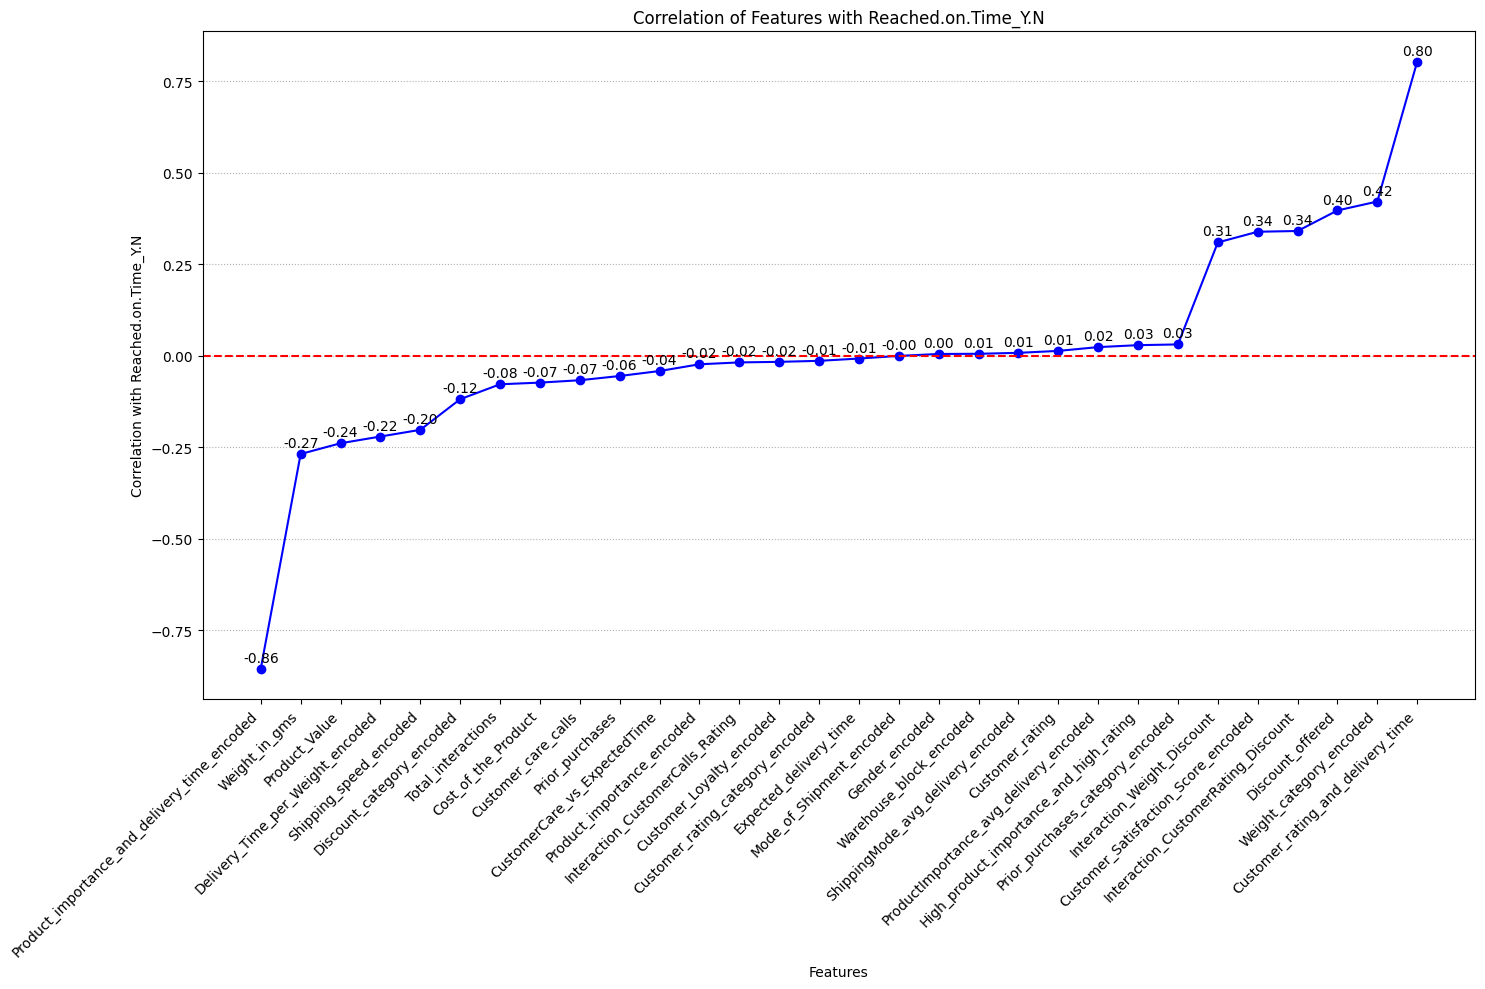

In [9]:
correlation_with_new_features = correlation_with_new_features.sort_values(by='Correlation with Reached.on.Time_Y.N', ascending=True)
correlation_with_new_features = correlation_with_new_features[correlation_with_new_features['Features'] != 'Reached.on.Time_Y.N']

# Reset the index after filtering so thar we can get proper order for features
correlation_with_new_features = correlation_with_new_features.reset_index(drop=True)

# Plotting the line chart for all features related to reached on time
plt.figure(figsize=(15, 10))
plt.plot(correlation_with_new_features['Features'], correlation_with_new_features['Correlation with Reached.on.Time_Y.N'], marker='o', color='b')
plt.axhline(y=0, color='r', linestyle='dashed', linewidth=1.5)
plt.xlabel('Features')
plt.ylabel('Correlation with Reached.on.Time_Y.N')
plt.title('Correlation of Features with Reached.on.Time_Y.N')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='dotted')
plt.tight_layout()

# Annotating the correlation values on the plot to add title to every feature with their correlation number
for i in range(len(correlation_with_new_features)):
    plt.annotate(f"{correlation_with_new_features['Correlation with Reached.on.Time_Y.N'][i]:.2f}",
                 (correlation_with_new_features['Features'][i], correlation_with_new_features['Correlation with Reached.on.Time_Y.N'][i]),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='center')

# Display the plot
plt.show()


### Findings : Correlation with encoded dataframe

*Negative Correlations:*

- "Product_importance_and_delivery_time_encoded": Strong negative correlation. Higher values indicate products with higher importance and longer delivery times, less likely to be delivered on time.

- "Weight_in_gms": Moderate negative correlation. Heavier products are less likely to be delivered on time.

- "Product_Value": Moderate negative correlation. Products with max values are less likely to be delivered on time.

- "Delivery_Time_per_Weight_encoded": Moderate negative correlation. Higher delivery time per weight leads to lower on-time delivery probability.

- "Shipping_speed_encoded": Moderate negative correlation. Faster shipping speeds are associated with higher on-time delivery.

*Positive Correlations:*
- "Customer_rating_and_delivery_time": Strong positive correlation. Products with max customer ratings and shorter delivery times are more likely to be delivered on time.

- "Customer_Satisfaction_Score_encoded": Strong positive correlation. Higher customer satisfaction scores indicate higher chances of on-time delivery.

- "Interaction_CustomerRating_Discount": Moderate positive correlation. Higher customer ratings and higher discounts lead to higher on-time delivery probability.

- "Discount_offered": Moderate positive correlation. Higher discounts are associated with higher on-time delivery.

- "Weight_category_encoded": Moderate positive correlation. Products categorized as "Heavy" have higher on-time delivery probability.

- "Customer_rating": Weak positive correlation. Higher customer ratings slightly increase on-time delivery chances.

- "ProductImportance_avg_delivery_encoded": Weak positive correlation. Higher average delivery rates for product importance result in higher on-time delivery probability.

- "High_product_importance_and_high_rating": Weak positive correlation. Products with high importance and high customer ratings have higher on-time delivery probability.

- "Prior_purchases_category_encoded": Weak positive correlation. Higher category of prior purchases slightly increases on-time delivery chances.

- "Interaction_Weight_Discount": Strong positive correlation. Interaction between weight and discount has a significant positive impact on on-time delivery.

- "Customer_Satisfaction_Score_encoded": Strong positive correlation. Higher customer satisfaction scores significantly increase on-time delivery probability.

- "Discount_offered": Strong positive correlation. Higher discounts significantly increase on-time delivery chances.

- "Weight_category_encoded": Strong positive correlation. Products categorized as "Heavy" have significantly higher on-time delivery probability.


### Scaling the dataset
To make sure that all features (input variables) in our dataset are on the same scale, standard scaling is applied to all. This is significant because the size of features can affect various machine learning algorithms and mathematical methodologies. We use standard scaling to give each feature a mean of 0 and a standard deviation of 1.

### Generic function to pass the dataframe and scale it on a same scale. 

In [10]:
def scale_dataframe(df, columns_to_exclude=[]):
    # Check if all columns are numerical
    if not all(df.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
        raise ValueError("All columns should be numerical for scaling.")

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Create a new DataFrame excluding the columns specified in columns_to_exclude
    df_to_scale = df.drop(columns=columns_to_exclude)

    # Fit and transform the numerical columns (excluding the ones specified) in the DataFrame
    scaled_df = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

    # Add the excluded columns back to the scaled DataFrame
    for col in columns_to_exclude:
        scaled_df[col] = df[col]

    return scaled_df


In [11]:
scaled_final_df = scale_dataframe(final_encoded_df, columns_to_exclude=['Reached.on.Time_Y.N'])
scaled_final_df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_encoded,Gender_encoded,Interaction_CustomerRating_Discount,Interaction_CustomerCalls_Rating,...,Shipping_speed_encoded,ProductImportance_avg_delivery_encoded,ShippingMode_avg_delivery_encoded,Product_importance_and_delivery_time_encoded,Weight_category_encoded,Discount_category_encoded,Customer_Loyalty_encoded,Customer_Satisfaction_Score_encoded,Delivery_Time_per_Weight_encoded,Reached.on.Time_Y.N
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,-2.004158,-0.991760,0.848439,-0.599095,...,-1.299241,0.548034,1.760714,-1.052780,0.507289,-1.914940,0.641639,-0.390888,-0.717531,1
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,-2.004158,1.008308,4.501367,1.135426,...,-0.400729,0.548034,1.760714,-1.052780,1.842779,-1.914940,-0.890910,1.606036,1.269817,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,-2.004158,1.008308,0.989615,-1.177268,...,1.267319,0.548034,1.760714,-1.052780,1.842779,-1.914940,0.641639,-0.390888,1.292583,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,-2.004158,1.008308,-0.175087,-0.454551,...,-1.058611,-1.035735,1.760714,-0.006090,0.507289,0.144753,0.641639,0.274753,-0.763062,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,-2.004158,-0.991760,0.919027,-1.177268,...,0.611842,-1.035735,1.760714,-0.006090,1.842779,-1.914940,0.641639,-0.390888,0.716682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730,0.638342,-0.991760,-0.686850,-1.177268,...,-1.080268,-1.035735,-0.002726,-0.006090,0.507289,0.144753,0.641639,-1.056529,-1.210369,1
10995,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679,0.638342,-0.991760,-0.598615,-1.177268,...,-1.287209,-1.035735,-0.002726,1.040599,0.507289,0.144753,0.641639,-1.722171,-1.412180,0
10996,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937,0.638342,-0.991760,-0.422145,1.135426,...,-1.567303,0.548034,-0.002726,1.040599,0.507289,0.144753,0.641639,0.274753,-1.488475,0
10997,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304,0.638342,1.008308,-0.633909,-0.310008,...,-1.534577,-1.035735,-0.002726,1.040599,0.507289,0.144753,-2.423459,-1.056529,-1.444175,0


### Imp Step 2 : Check the correlation of scaled dataframe with respect to Reached.on.Time_Y.N

In [12]:
#checking the correlation of sclaed dataframe with respect to Reached.on.Time_Y.N
correlation_with_new_features = scaled_final_df.corrwith(scaled_final_df['Reached.on.Time_Y.N']).reset_index()
correlation_with_new_features.columns = ['Features', 'Correlation with Reached.on.Time_Y.N']
correlation_with_new_features =  correlation_with_new_features.sort_values(by='Correlation with Reached.on.Time_Y.N', ascending=True)
correlation_with_new_features

,Features,Correlation with Reached.on.Time_Y.N
24,Product_importance_and_delivery_time_encoded,-0.855516
5,Weight_in_gms,-0.268793
16,Product_Value,-0.239417
29,Delivery_Time_per_Weight_encoded,-0.221003
21,Shipping_speed_encoded,-0.202709
26,Discount_category_encoded,-0.119007
10,Total_interactions,-0.078171
2,Cost_of_the_Product,-0.073587
0,Customer_care_calls,-0.067126
3,Prior_purchases,-0.055515


### To make it more understandble, below is the graph which shows the correlation line with respect to scaled features and Correlation with Reached.on.Time_Y.N

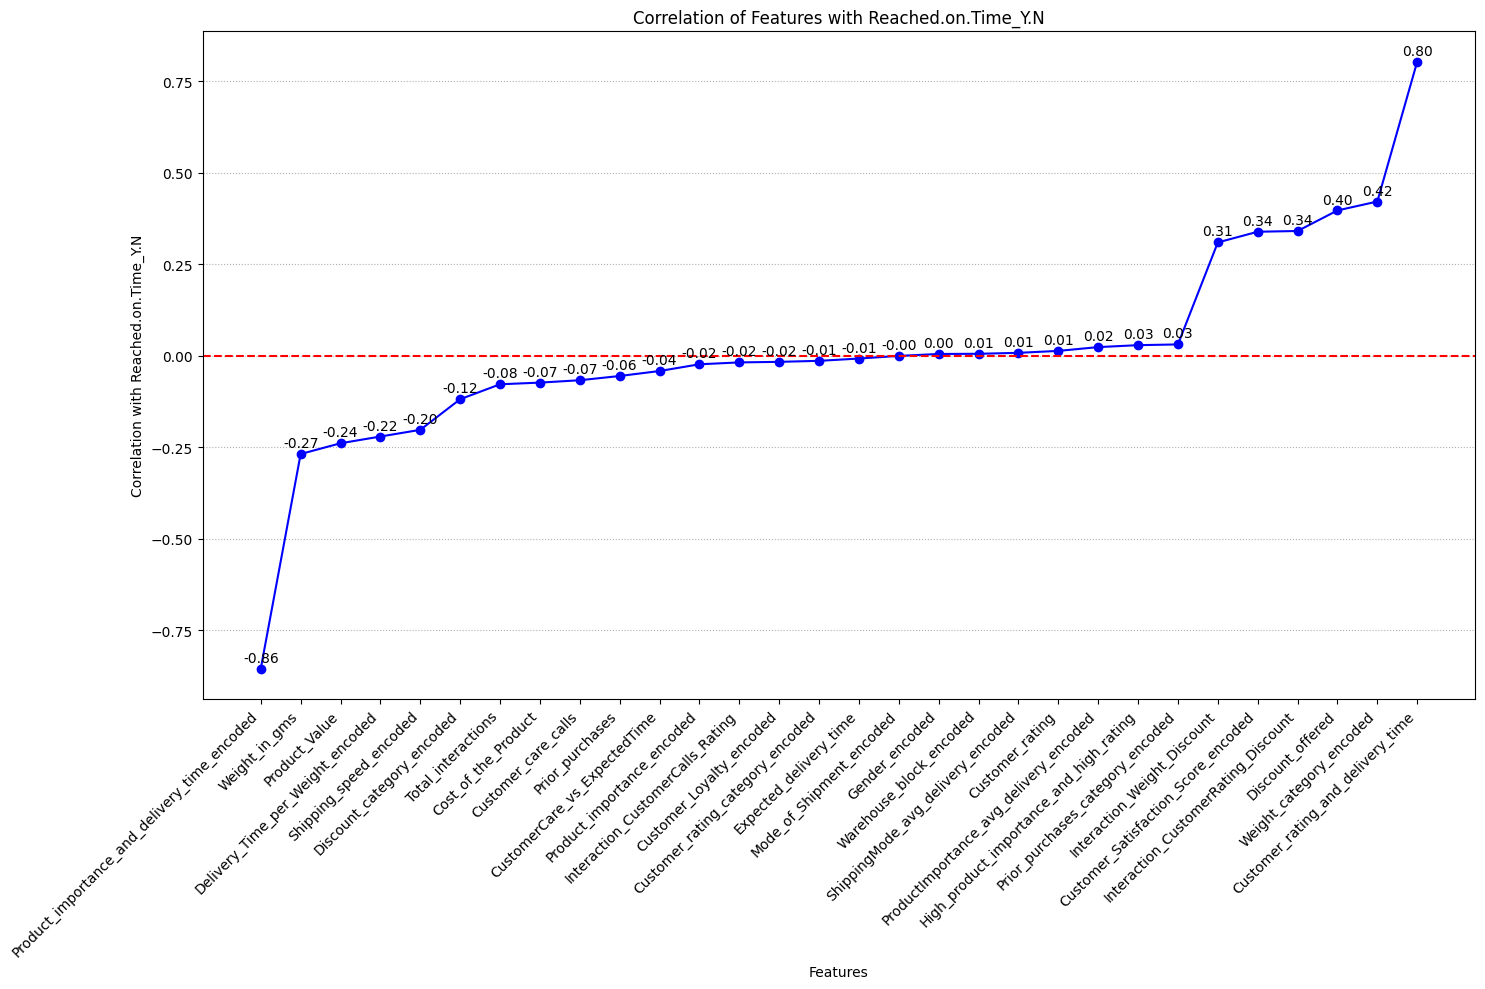

In [13]:
correlation_with_new_features = correlation_with_new_features.sort_values(by='Correlation with Reached.on.Time_Y.N', ascending=True)
correlation_with_new_features = correlation_with_new_features[correlation_with_new_features['Features'] != 'Reached.on.Time_Y.N']

# Reset the index after filtering so thar we can get proper order for features
correlation_with_new_features = correlation_with_new_features.reset_index(drop=True)

# Plotting the line chart for all features related to reached on time
plt.figure(figsize=(15, 10))
plt.plot(correlation_with_new_features['Features'], correlation_with_new_features['Correlation with Reached.on.Time_Y.N'], marker='o', color='b')
plt.axhline(y=0, color='r', linestyle='dashed', linewidth=1.5)
plt.xlabel('Features')
plt.ylabel('Correlation with Reached.on.Time_Y.N')
plt.title('Correlation of Features with Reached.on.Time_Y.N')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='dotted')
plt.tight_layout()

# Annotating the correlation values on the plot to add title to every feature with their correlation number
for i in range(len(correlation_with_new_features)):
    plt.annotate(f"{correlation_with_new_features['Correlation with Reached.on.Time_Y.N'][i]:.2f}",
                 (correlation_with_new_features['Features'][i], correlation_with_new_features['Correlation with Reached.on.Time_Y.N'][i]),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='center')

# Display the plot
plt.show()

### export the data to csv to perform Machine learning algorithm with selecting effective features

In [14]:
output_csv_path = os.path.join(dataset_dir, 'stride_features_scaled.csv')
scaled_final_df.to_csv(output_csv_path, index=False)

#Print a message to confirm the successful saving of the CSV file
print(f"DataFrame has been saved to {output_csv_path} with all added feature columns and data.")

DataFrame has been saved to /Users/ashleshkhajbage/Documents/GitHub/Stride-Logistics-Analytics/source_code/Phase2/../../Dataset/stride_features_scaled.csv with all added feature columns and data.
